# Analyzing Freddie Mac Single Family Loans

## Abstract
The Federal Home Loan Mortgage Corporation (FHLMC), known as Freddie Mac, is a public government-sponsored enterprise which was created to expand the secondary market for mortgages in the United States. Freddie Mac buys mortgages on the secondary market, pools them, and sells them as a mortgage-backed security to investors on the open market. This secondary mortgage market increases the supply of money available for mortgage lending and increases the money available for new home purchases.
<br>
<br>
For example, when your typical American family of 4 purchases a home, they need to exchange money with the seller. More often than not, the family does not have [650,000 USD](https://la.curbed.com/2018/7/24/17608186/los-angeles-median-home-price-june-core-logic) on-hand to pay to the seller. However, they are able to afford by taking out a loan from a bank and making monthly payments over 15-30 years. The amount of each monthly payment is [calculated](https://www.calculator.net/finance-calculator.html) by the loan length, amount, and the interest rate. From a top-down view, the interest rate on that loan is mainly influenced by The Federal Reserve's manipulation of the [Federal Funds Rate](https://en.wikipedia.org/wiki/Federal_funds_rate) (but we won't cover that now) & a combination of other factors, including but not limited to: the individual consumer's credit score, home price & location, down payment, and the loan & interest rate types. Now back to the bank, whom has agreed to lend the family a specified amount for a specified period and now finds itself without that money in its reserves. If a bank doesn't have money to lend, how can it function? Enter Freddie Mac who then buys the rights to the family's loan, thereby giving the bank the capital it needs. Freddie Mac does this thousands & thousands of times, pooling the mortgages to then sell to investors. This way, the family can make monthly payments and live in their home and the bank can continue to have capital to lend. Broadly speaking, you could say investors in these pooled investments are the actual owners of the family's loan, NOT the bank! Much like the equity market, investors in mortgage-backed-securities can see the value of their investment rise or fall. These mortgage "pools" one can invest in can be grouped by credit quality, geographic location, value, etc. If for example, there is a local recession in Dallas, TX. Homeowners lose work & cannot make their monthly loan payments. The investor whom bought the Dallas-pool will see the value of their investment fall. Likewise, if the real-estate market & general economy in Charleston, SC is booming, the pooled-South Carolina MBS portfolio will appreciate in value. I'd like to add in there are many other reasons for an increase/decrease in value and my example should be considered limited. Please see [here](http://people.stern.nyu.edu/igiddy/ABS/absmbs.pdf) for a further intro.

## The Motivation
Freddie Mac and Fannie Mae as a GSE & with the implicit guarantee of US government-backing, was able to generate huge profits prior to the 2007 financial crisis. Investment banks created financial products through [securitization](https://www.imf.org/external/pubs/ft/fandd/2008/09/pdf/basics.pdf) in an attempt to share in the mortgage market profits & sold these to investors such as pension & hedge funds, foreign governments, and insurance companies. As Freddie Mac & Fannie Mae began losing monopoly status as a result of these securitized products, the GSEs increased their purchases of subprime loans (those with low credit quality), all with the backing of the federal government. As housing prices began to peak, home equity fell, and Freddie Mac/Fannie Mae began experiencing large credit-related losses in their subprime positions. Sell-offs ensued and this triggered the global financial crisis. <br>
<br>
Whether as an investor or a lending institution, it becomes prudent to conduct proper diligence on the strength of underlying assets within any financial product. For American employees with x% of their bi-weekly paycheck withheld to be invested in a retirement plan, it can be difficult to ascertain the true nature of the value of their retirement portfolio, especially when linked (though indirectly), to products with hundreds of thousands of underlying individual assets (single family homes). This project aims to provide transparency to single-family home loans and will examine, through supervised-learning models, the strength of the of the U.S. mortgage market. 

## The Data
At the direction of its regulator, the Federal Housing Finance Agency (FHFA), Freddie Mac has made the Single Family Loan-Level Dataset (the "Dataset") available as part of a larger effort to increase transparency and help investors build mre accurate credit performance models in support of ongoing and future credit risk-sharing transactions. The Dataset includes: <br>
1. Loan-level origination, monthly loan performance, and actual loss data on a portion of the fully amortizing 30-year fixed-rate Single Family mortgages that Freddie Mac acquired with origination dates from 1999 to the Origination Cutoff Date. 
2. Loan-level origination, monthly loan performance, and actual loss data on a portion of the fully amortizing 15- and 20-year fixed-rate Single Family mortgages that Freddie Mac acquired with origination dates from January 1, 2005, to the Origination Cutoff Date. 
Loan performance information in the Dataset includes the monthly loan balance, delinquency status and certain information up to and including the earliest of the following termination events: <br>
    a. Prepaid or Matured (voluntary Payoff) <br>
    b. Foreclosure Alternative Group (Short Sale, Third Party Sale, Charge Off or Note Sale) <br>
    c. Repurchase prior to Property Disposition. <br>
    d. REO Disposition <br>

### Single Family Loan-Level Dataset Sample
Freddie Mac has created a smaller dataset which is a simple random sample of 50,000 loans selected from each full vintage year and a proportionate nubmer of loans from each partial vintage year of the full Single Family Loan-Level Dataset. Each vintage year has one origination data file and one corresponding monthly performance data file, containing the same loan-level data fields as those included in the full Dataset.

## Hypothesis
The outcome of housing loan defaults can be statistically modeled and predicted as a function of the applicant's financial status, conditions within the overall economy, and other loan-specific features at time of origination.

## Dataset Characteristics (merged file)
commentary
<br>
<br>Time period: 2012 to 2016
<br>Number of loans:
<br>Features:
* Loan ID
* Loan Delinquency Status
* Credit Score
* Interest Rate
* Loan-to-Value Ratio
* Debt-to-Income Ratio
* Combined Loan-to-Value Ratio
* Unpaid Principal Balance
* Mortgage Insurance Percentage
* Purpose of Loan
* Number of Units in Loan
* Occupancy Status
* Number of Borrowers per Loan
* First-Time Homebuyer Flag
* Super-Conforming Flag
* Prepayment Penalty Flag
* State (geographic)
* Property Type
* Loan Channel
* Loan Seller
* Loan Servicer
* Term of Loan
* Maturity Date
* First Payment Date

# Initial Data Import & Treatment
Origination and performance data must be downloaded individually by year from the Freddie Mac website. <br>
<br>
Format as follows: <br>
sample_orig_YYYY.txt --> origination data <br>
sample_svcg_YYYY.txt --> monthly performance data <br>
<br>
Both origination and performance files share the common "loan sequence number" which serves as the unique loan identifier. The "loan sequence number" includes the year and quarter (Q1, Q2, etc) of loan origination. The performance file shows monthly performance for each loan, thus there are multiple rows (month1, month2, etc) corresponding to each "loan sequence number". There are multiple null values and data-types within the datasets, and the data is considered "living", meaning it is subject to change as Freddie Mac receives & updates to their housing loan profiles.

In [150]:
# Import Modules:
import time
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Aesthetics.
%matplotlib inline

# Suppressing "Future Warning"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load raw files.
orig2012 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2012.txt', sep='|', header=None)
orig2013 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2013.txt', sep='|', header=None)
orig2014 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2014.txt', sep='|', header=None)
orig2015 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2015.txt', sep='|', header=None)
orig2016 = pd.read_csv('~/src/data/u3CapstoneData/origination-data/sample_orig_2016.txt', sep='|', header=None)

perf2012 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2012.txt', sep='|', header=None, low_memory=False)
perf2013 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2013.txt', sep='|', header=None, low_memory=False)
perf2014 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2014.txt', sep='|', header=None, low_memory=False)
perf2015 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2015.txt', sep='|', header=None, low_memory=False)
perf2016 = pd.read_csv('~/src/data/u3CapstoneData/perf-data/sample_svcg_2016.txt', sep='|', header=None, low_memory=False)

In [3]:
# Setting header names & apply.
orig_cols = ['creditScore', 'firstPaymentDate', 'firstTimeHomebuyerFlag', 'maturityDate',
                   'metroArea', 'miPercentage', 'numberOfUnits',
                   'occupancyStatus', 'cltvRatio', 'dtiRatio', 'upb',
                   'ltvRatio', 'interestRate', 'channel', 'ppmFlag', 'productType',
                   'propertyState', 'propertyType', 'postalCode', 'lsn',
                   'loanPurpose', 'originalLoanTerm', 'numberOfBorrowers', 'sellerName',
                   'servicerName', 'superConformingFlag'] # 'pre-HarpLoanSequenceNumber'

perf_cols = ['lsn', 'monthlyReportingPeriod', 'currentActualUpb',
                 'dlq', 'loanAge', 'remainMthsToMaturity', 'repurchaseFlag',
                 'modificationFlag', 'zeroBalCode', 'zeroBalEffDate', 'currentIntRate',
                 'curDeferredUpb', 'ddlpi', 'miRecov', 'netSalesProceeds', 'nonMiRecov',
                 'expenses', 'legalCosts', 'maintPreservationCosts', 'taxesInsurance',
                 'miscExpenses', 'actualLossCalc', 'modificationCost',
                 'stepModificationFlag', 'deferredPaymentModification']

orig2012.columns = orig_cols
orig2013.columns = orig_cols
orig2014.columns = orig_cols
orig2015.columns = orig_cols
orig2016.columns = orig_cols

perf2012.columns = perf_cols
perf2013.columns = perf_cols
perf2014.columns = perf_cols
perf2015.columns = perf_cols
perf2016.columns = perf_cols

In [4]:
# Merge origination files.
frames_orig = [orig2012, orig2013, orig2014, orig2015, orig2016]
orig_combined = pd.concat(frames_orig)
print(orig_combined.shape)
orig_combined.head()

(250000, 26)


,creditScore,firstPaymentDate,firstTimeHomebuyerFlag,maturityDate,metroArea,miPercentage,numberOfUnits,occupancyStatus,cltvRatio,dtiRatio,...,propertyState,propertyType,postalCode,lsn,loanPurpose,originalLoanTerm,numberOfBorrowers,sellerName,servicerName,superConformingFlag
0,814,201203,9,204202,49420.0,0,1,P,57,36,...,WA,SF,98900,F112Q1000057,C,360,2,Other sellers,Other servicers,NaN
1,745,201204,9,204203,NaN,0,1,S,69,31,...,NH,SF,3200,F112Q1000089,P,360,2,Other sellers,"PNCBANK,NATL",NaN
2,707,201203,9,204202,47260.0,0,1,P,80,36,...,VA,SF,23000,F112Q1000137,C,360,2,Other sellers,Other servicers,NaN
3,712,201203,9,204202,31540.0,0,1,P,59,21,...,WI,SF,53500,F112Q1000154,N,360,2,Other sellers,Other servicers,NaN
4,783,201203,9,204202,21060.0,0,1,I,75,25,...,KY,SF,42700,F112Q1000162,N,360,2,Other sellers,Other servicers,NaN


In [5]:
# Create 'year' column within the merged origination file.
# The loan sequence number 'lsn' is formatted F1YYQnXXXXXX,
# where F1 refers to the product 'Fixed Rate Mortgage',
# YYQn refers to origination year and quarter.

orig_combined['year'] = ['19' + x if x == '99' else '20' + x
                         for x in (orig_combined['lsn'].apply(lambda x: x[2:4]))]
orig_combined.tail()

,creditScore,firstPaymentDate,firstTimeHomebuyerFlag,maturityDate,metroArea,miPercentage,numberOfUnits,occupancyStatus,cltvRatio,dtiRatio,...,propertyType,postalCode,lsn,loanPurpose,originalLoanTerm,numberOfBorrowers,sellerName,servicerName,superConformingFlag,year
49995,808,201701,N,204612,21780.0,0,1,P,80,21,...,SF,47700,F116Q4434422,P,360,1,Other sellers,Other servicers,NaN,2016
49996,721,201701,9,204612,35614.0,0,2,P,55,49,...,SF,10400,F116Q4434529,C,360,1,"JPMORGANCHASEBANK,NA","JPMORGANCHASEBANK,NA",NaN,2016
49997,716,201710,9,204709,38060.0,0,1,P,66,35,...,PU,85100,F116Q4434568,N,360,2,Other sellers,Other servicers,NaN,2016
49998,791,201701,9,204612,37964.0,0,1,I,72,39,...,SF,19000,F116Q4434582,P,360,2,Other sellers,Other servicers,NaN,2016
49999,721,201710,9,204709,39340.0,25,1,P,88,40,...,SF,84000,F116Q4434621,N,360,2,Other sellers,Other servicers,NaN,2016


In [6]:
# Merge performance files.
frames_perf = [perf2012, perf2013, perf2014, perf2015, perf2016]
perf_combined = pd.concat(frames_perf)
print(perf_combined.shape)
perf_combined.head()

(8727988, 25)


,lsn,monthlyReportingPeriod,currentActualUpb,dlq,loanAge,remainMthsToMaturity,repurchaseFlag,modificationFlag,zeroBalCode,zeroBalEffDate,...,nonMiRecov,expenses,legalCosts,maintPreservationCosts,taxesInsurance,miscExpenses,actualLossCalc,modificationCost,stepModificationFlag,deferredPaymentModification
0,F112Q1000057,201202,103000.0,0,0,360,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1,F112Q1000057,201203,103000.0,0,1,359,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,F112Q1000057,201204,103000.0,0,2,358,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,F112Q1000057,201205,102000.0,0,3,357,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
4,F112Q1000057,201206,102000.0,0,4,356,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [7]:
# Check deliquency values, we will have to remove whitespace for '0' later.
perf_combined['dlq'].value_counts()

0     7857555
0      830116
1       25190
2        4436
1        2774
3        1793
4        1093
5         873
6         602
7         465
2         427
8         372
9         325
10        263
11        211
12        190
3         153
13        152
14        117
R         101
15         85
16         78
17         67
4          65
18         51
5          43
19         39
20         32
21         29
25         26
       ...   
8          15
27         13
10         12
9          11
30         10
28         10
29          9
31          6
32          6
33          5
34          4
36          4
11          4
35          4
37          3
12          3
XX          2
38          2
41          2
40          2
39          2
13          2
44          1
45          1
47          1
14          1
48          1
43          1
46          1
42          1
Name: dlq, Length: 66, dtype: int64

In [8]:
# Delinquency Status values where XX = Unknown, R = REO Acquistion
perf_combined['dlq'] = [999 if x == 'R' else x for x in (perf_combined['dlq'].apply(lambda x: x))]
perf_combined['dlq'] = [0 if x == 'XX' else x for x in (perf_combined['dlq'].apply(lambda x: x))]

In [9]:
# Not delinquent ie: '0' adds up including the 2 'XX's.
perf_combined['dlq'].value_counts()

0      7857555
0       830118
1        25190
2         4436
1         2774
3         1793
4         1093
5          873
6          602
7          465
2          427
8          372
9          325
10         263
11         211
12         190
3          153
13         152
14         117
999        101
15          85
16          78
17          67
4           65
18          51
5           43
19          39
20          32
21          29
25          26
        ...   
7           15
8           15
27          13
10          12
9           11
30          10
28          10
29           9
31           6
32           6
33           5
11           4
34           4
36           4
35           4
12           3
37           3
40           2
13           2
38           2
41           2
39           2
48           1
43           1
47           1
44           1
45           1
46           1
14           1
42           1
Name: dlq, Length: 65, dtype: int64

In [10]:
# Combining based on loan sequence number.
orig_combined['is_dlq'] = orig_combined['lsn'].map(
    perf_combined.set_index('lsn')['dlq'].to_dict())
orig_combined.head()

,creditScore,firstPaymentDate,firstTimeHomebuyerFlag,maturityDate,metroArea,miPercentage,numberOfUnits,occupancyStatus,cltvRatio,dtiRatio,...,postalCode,lsn,loanPurpose,originalLoanTerm,numberOfBorrowers,sellerName,servicerName,superConformingFlag,year,is_dlq
0,814,201203,9,204202,49420.0,0,1,P,57,36,...,98900,F112Q1000057,C,360,2,Other sellers,Other servicers,NaN,2012,0
1,745,201204,9,204203,NaN,0,1,S,69,31,...,3200,F112Q1000089,P,360,2,Other sellers,"PNCBANK,NATL",NaN,2012,0
2,707,201203,9,204202,47260.0,0,1,P,80,36,...,23000,F112Q1000137,C,360,2,Other sellers,Other servicers,NaN,2012,0
3,712,201203,9,204202,31540.0,0,1,P,59,21,...,53500,F112Q1000154,N,360,2,Other sellers,Other servicers,NaN,2012,0
4,783,201203,9,204202,21060.0,0,1,I,75,25,...,42700,F112Q1000162,N,360,2,Other sellers,Other servicers,NaN,2012,0


In [11]:
# Renaming dataframe.
merged_df = orig_combined

In [12]:
len(merged_df)

250000

In [13]:
merged_df.columns

Index(['creditScore', 'firstPaymentDate', 'firstTimeHomebuyerFlag',
       'maturityDate', 'metroArea', 'miPercentage', 'numberOfUnits',
       'occupancyStatus', 'cltvRatio', 'dtiRatio', 'upb', 'ltvRatio',
       'interestRate', 'channel', 'ppmFlag', 'productType', 'propertyState',
       'propertyType', 'postalCode', 'lsn', 'loanPurpose', 'originalLoanTerm',
       'numberOfBorrowers', 'sellerName', 'servicerName',
       'superConformingFlag', 'year', 'is_dlq'],
      dtype='object')

In [14]:
# Second check for nulls.
print('nulls before:', merged_df['is_dlq'].isnull().sum())

# Fill NaNs.
merged_df['is_dlq'] = merged_df['is_dlq'].fillna(0)
print('nulls after:', merged_df['is_dlq'].isnull().sum())

nulls before: 4
nulls after: 0


In [15]:
# Let's come back to the whitespace.
# Per the Freddie Mac manual on delinquency status:
#    0 = Current, or less than 30 days past due.
#    Space (3) = Unavailable
#    XX = Unknown

merged_df.is_dlq.value_counts()

0      197881
0       49480
1        1136
2         386
1         290
3         188
2         142
4          65
999        60
3          55
5          52
6          40
7          31
8          20
10         19
9          17
11         17
12         13
5          11
13         11
4          11
16          9
14          9
6           6
19          6
20          5
17          5
25          5
15          4
18          4
7           3
10          2
29          2
21          2
27          2
8           2
32          1
41          1
37          1
33          1
48          1
12          1
14          1
26          1
30          1
Name: is_dlq, dtype: int64

In [16]:
# We will assume 'unavailable' loan delinquency status as not-delinquent.

# Change dtype for 'dlq'.
merged_df['is_dlq'] = merged_df['is_dlq'].astype('int64')
merged_df.is_dlq.value_counts()

0      247361
1        1426
2         528
3         243
4          76
5          63
999        60
6          46
7          34
8          22
10         21
9          17
11         17
12         14
13         11
14         10
16          9
19          6
17          5
20          5
25          5
15          4
18          4
27          2
21          2
29          2
48          1
26          1
30          1
32          1
33          1
37          1
41          1
Name: is_dlq, dtype: int64

In [17]:
# Creating the binary feature for delinquent loan. 
merged_df['is_dlq'] = merged_df['is_dlq'].apply(lambda x: 1 if x >= 1 else 0)
merged_df.is_dlq.value_counts()

0    247361
1      2639
Name: is_dlq, dtype: int64

In [18]:
len(merged_df)

250000

In [19]:
# Renaming dataframe.
df1 = merged_df
print(df1.columns)
df1.tail()

Index(['creditScore', 'firstPaymentDate', 'firstTimeHomebuyerFlag',
       'maturityDate', 'metroArea', 'miPercentage', 'numberOfUnits',
       'occupancyStatus', 'cltvRatio', 'dtiRatio', 'upb', 'ltvRatio',
       'interestRate', 'channel', 'ppmFlag', 'productType', 'propertyState',
       'propertyType', 'postalCode', 'lsn', 'loanPurpose', 'originalLoanTerm',
       'numberOfBorrowers', 'sellerName', 'servicerName',
       'superConformingFlag', 'year', 'is_dlq'],
      dtype='object')


,creditScore,firstPaymentDate,firstTimeHomebuyerFlag,maturityDate,metroArea,miPercentage,numberOfUnits,occupancyStatus,cltvRatio,dtiRatio,...,postalCode,lsn,loanPurpose,originalLoanTerm,numberOfBorrowers,sellerName,servicerName,superConformingFlag,year,is_dlq
49995,808,201701,N,204612,21780.0,0,1,P,80,21,...,47700,F116Q4434422,P,360,1,Other sellers,Other servicers,NaN,2016,0
49996,721,201701,9,204612,35614.0,0,2,P,55,49,...,10400,F116Q4434529,C,360,1,"JPMORGANCHASEBANK,NA","JPMORGANCHASEBANK,NA",NaN,2016,0
49997,716,201710,9,204709,38060.0,0,1,P,66,35,...,85100,F116Q4434568,N,360,2,Other sellers,Other servicers,NaN,2016,0
49998,791,201701,9,204612,37964.0,0,1,I,72,39,...,19000,F116Q4434582,P,360,2,Other sellers,Other servicers,NaN,2016,0
49999,721,201710,9,204709,39340.0,25,1,P,88,40,...,84000,F116Q4434621,N,360,2,Other sellers,Other servicers,NaN,2016,0


In [20]:
# Check for nulls.
df1.isnull().sum()

creditScore                    0
firstPaymentDate               0
firstTimeHomebuyerFlag         0
maturityDate                   0
metroArea                  26492
miPercentage                   0
numberOfUnits                  0
occupancyStatus                0
cltvRatio                      0
dtiRatio                       0
upb                            0
ltvRatio                       0
interestRate                   0
channel                        0
ppmFlag                       95
productType                    0
propertyState                  0
propertyType                   0
postalCode                     0
lsn                            0
loanPurpose                    0
originalLoanTerm               0
numberOfBorrowers              0
sellerName                     0
servicerName                   0
superConformingFlag       239659
year                           0
is_dlq                         0
dtype: int64

In [21]:
df1.ppmFlag.value_counts()

N    249905
Name: ppmFlag, dtype: int64

In [22]:
df1.superConformingFlag.value_counts()

Y    10341
Name: superConformingFlag, dtype: int64

In [23]:
# Fill remaining nulls.
df1['metroArea'] = df1['metroArea'].fillna(0)
df1['ppmFlag'] = df1['ppmFlag'].fillna('Y')
df1['superConformingFlag'] = df1['superConformingFlag'].fillna('N')

df1.isnull().sum()

creditScore               0
firstPaymentDate          0
firstTimeHomebuyerFlag    0
maturityDate              0
metroArea                 0
miPercentage              0
numberOfUnits             0
occupancyStatus           0
cltvRatio                 0
dtiRatio                  0
upb                       0
ltvRatio                  0
interestRate              0
channel                   0
ppmFlag                   0
productType               0
propertyState             0
propertyType              0
postalCode                0
lsn                       0
loanPurpose               0
originalLoanTerm          0
numberOfBorrowers         0
sellerName                0
servicerName              0
superConformingFlag       0
year                      0
is_dlq                    0
dtype: int64

In [24]:
df1.productType.value_counts()

FRM    250000
Name: productType, dtype: int64

In [25]:
# Removing cols.
df1 = df1.drop(['productType', 'metroArea', 'postalCode'], axis=1)
df1.columns

Index(['creditScore', 'firstPaymentDate', 'firstTimeHomebuyerFlag',
       'maturityDate', 'miPercentage', 'numberOfUnits', 'occupancyStatus',
       'cltvRatio', 'dtiRatio', 'upb', 'ltvRatio', 'interestRate', 'channel',
       'ppmFlag', 'propertyState', 'propertyType', 'lsn', 'loanPurpose',
       'originalLoanTerm', 'numberOfBorrowers', 'sellerName', 'servicerName',
       'superConformingFlag', 'year', 'is_dlq'],
      dtype='object')

In [26]:
# Renaming dataframe.
df2 = df1

In [27]:
# Reordering columns, assigning variables for each column.
lsn_var = df2['lsn']
is_dlq_var = df2['is_dlq']
creditScore_var = df2['creditScore']
interestRate_var = df2['interestRate']
ltvRatio_var = df2['ltvRatio']
dtiRatio_var = df2['dtiRatio']
cltvRatio_var = df2['cltvRatio']
upb_var = df2['upb']
miPercentage_var = df2['miPercentage']
loanPurpose_var = df2['loanPurpose']
numberOfUnits_var = df2['numberOfUnits']
occupancyStatus_var = df2['occupancyStatus']
numberOfBorrowers_var = df2['numberOfBorrowers']
firstTimeHomebuyerFlag_var = df2['firstTimeHomebuyerFlag']
superConformingFlag_var = df2['superConformingFlag']
ppmFlag_var = df2['ppmFlag']
propertyState_var = df2['propertyState']
propertyType_var = df2['propertyType']
channel_var = df2['channel']
sellerName_var = df2['sellerName']
servicerName_var = df2['servicerName']
originalLoanTerm_var = df2['originalLoanTerm']
maturityDate_var = df2['maturityDate']
firstPaymentDate_var = df2['firstPaymentDate']
year_var = df2['year']

In [28]:
# Remove columns then add back in specified order.
df2.drop(['lsn', 'is_dlq', 'creditScore', 'interestRate', 'ltvRatio',
          'dtiRatio', 'cltvRatio', 'upb', 'miPercentage', 'loanPurpose',
          'numberOfUnits', 'occupancyStatus', 'numberOfBorrowers',
          'firstTimeHomebuyerFlag', 'superConformingFlag', 'ppmFlag',
          'propertyState', 'propertyType', 'channel', 'sellerName',
          'servicerName', 'originalLoanTerm', 'maturityDate',
          'firstPaymentDate', 'year'], axis=1, inplace=True)

# Reorder & rename.
df2.insert(0, 'lsn', lsn_var)
df2.insert(1, 'dlq', is_dlq_var)
df2.insert(2, 'credit_score', creditScore_var)
df2.insert(3, 'int_rate', interestRate_var)
df2.insert(4, 'ltv_ratio', ltvRatio_var)
df2.insert(5, 'dti_ratio', dtiRatio_var)
df2.insert(6, 'cltv_ratio', cltvRatio_var)
df2.insert(7, 'unpaid_princ_bal', upb_var)
df2.insert(8, 'mortgage_insurance_pctg', miPercentage_var)
df2.insert(9, 'loan_purpose', loanPurpose_var)
df2.insert(10, 'no_of_units', numberOfUnits_var)
df2.insert(11, 'occupancy_status', occupancyStatus_var)
df2.insert(12, 'no_of_borrowers', numberOfBorrowers_var)
df2.insert(13, 'first_home_flag', firstTimeHomebuyerFlag_var)
df2.insert(14, 'super_conform_flag', superConformingFlag_var)
df2.insert(15, 'ppm_flag', ppmFlag_var)
df2.insert(16, 'state', propertyState_var)
df2.insert(17, 'prop_type', propertyType_var)
df2.insert(18, 'channel', channel_var)
df2.insert(19, 'seller', sellerName_var)
df2.insert(20, 'servicer', servicerName_var)
df2.insert(21, 'loan_term', originalLoanTerm_var)
df2.insert(22, 'maturity_date', maturityDate_var)
df2.insert(23, 'first_pmt_date', firstPaymentDate_var)
df2.insert(24, 'year', year_var)

# View.
print(df2.columns)
print(df2.shape)

Index(['lsn', 'dlq', 'credit_score', 'int_rate', 'ltv_ratio', 'dti_ratio',
       'cltv_ratio', 'unpaid_princ_bal', 'mortgage_insurance_pctg',
       'loan_purpose', 'no_of_units', 'occupancy_status', 'no_of_borrowers',
       'first_home_flag', 'super_conform_flag', 'ppm_flag', 'state',
       'prop_type', 'channel', 'seller', 'servicer', 'loan_term',
       'maturity_date', 'first_pmt_date', 'year'],
      dtype='object')
(250000, 25)


In [29]:
# Change dtypes.
df2[['loan_term', 'maturity_date', 'first_pmt_date']] = df2[[
'loan_term', 'maturity_date', 'first_pmt_date'
]].astype('object')

df2[['year']] = df2[['year']].astype('int64')


# View.
df2.dtypes

lsn                         object
dlq                          int64
credit_score                 int64
int_rate                   float64
ltv_ratio                    int64
dti_ratio                    int64
cltv_ratio                   int64
unpaid_princ_bal             int64
mortgage_insurance_pctg      int64
loan_purpose                object
no_of_units                  int64
occupancy_status            object
no_of_borrowers              int64
first_home_flag             object
super_conform_flag          object
ppm_flag                    object
state                       object
prop_type                   object
channel                     object
seller                      object
servicer                    object
loan_term                   object
maturity_date               object
first_pmt_date              object
year                         int64
dtype: object

In [30]:
# Viewing missing/unavailable ratios per specified loan-sequence number.
# These are represented by either 999 or 9999.

#print(df2.credit_score.value_counts())
print(df2.loc[df2['credit_score'] == 9999])

#print(df2.ltv_ratio.value_counts())
print(df2.loc[df2['ltv_ratio'] == 999])

#print(df2.dti_ratio.value_counts())
print(df2.loc[df2['dti_ratio'] == 999])

#print(df2.cltv_ratio.value_counts())
print(df2.loc[df2['cltv_ratio'] == 999])

                lsn  dlq  credit_score  int_rate  ltv_ratio  dti_ratio  \
20021  F113Q2240889    0          9999     3.500         60         23   
30996  F113Q3367143    0          9999     4.750         80         26   
47229  F113Q4171521    0          9999     3.310         75         36   
42751  F114Q4110544    0          9999     4.750         95         32   
48915  F114Q4238219    0          9999     4.375         54         20   
8594   F116Q1191757    0          9999     4.750         80         25   
25137  F116Q3004784    0          9999     3.500         80         35   
42634  F116Q4178226    0          9999     3.625         83         44   
47326  F116Q4339738    0          9999     3.875         38         24   

       cltv_ratio  unpaid_princ_bal  mortgage_insurance_pctg loan_purpose  \
20021          60            337000                        0            P   
30996          80            189000                        0            P   
47229          75           

In [31]:
# Remove these from the dataset.
df3 = df2
df3.drop(df2[df2.credit_score == 9999].index, inplace=True)
df3.drop(df2[df2.ltv_ratio == 999].index, inplace=True)
df3.drop(df2[df2.dti_ratio == 999].index, inplace=True)
df3.drop(df2[df2.cltv_ratio == 999].index, inplace=True)

# Exploratory Data Analysis

In [32]:
# Rename for EDA.
df = df3
print(df.columns)
df.head()

Index(['lsn', 'dlq', 'credit_score', 'int_rate', 'ltv_ratio', 'dti_ratio',
       'cltv_ratio', 'unpaid_princ_bal', 'mortgage_insurance_pctg',
       'loan_purpose', 'no_of_units', 'occupancy_status', 'no_of_borrowers',
       'first_home_flag', 'super_conform_flag', 'ppm_flag', 'state',
       'prop_type', 'channel', 'seller', 'servicer', 'loan_term',
       'maturity_date', 'first_pmt_date', 'year'],
      dtype='object')


,lsn,dlq,credit_score,int_rate,ltv_ratio,dti_ratio,cltv_ratio,unpaid_princ_bal,mortgage_insurance_pctg,loan_purpose,...,ppm_flag,state,prop_type,channel,seller,servicer,loan_term,maturity_date,first_pmt_date,year
0,F112Q1000057,0,814,4.00,57,36,57,103000,0,C,...,N,WA,SF,R,Other sellers,Other servicers,360,204202,201203,2012
1,F112Q1000089,0,745,4.00,69,31,69,417000,0,P,...,N,NH,SF,R,Other sellers,"PNCBANK,NATL",360,204203,201204,2012
2,F112Q1000137,0,707,4.50,80,36,80,146000,0,C,...,N,VA,SF,R,Other sellers,Other servicers,360,204202,201203,2012
3,F112Q1000154,0,712,4.00,59,21,59,381000,0,N,...,N,WI,SF,R,Other sellers,Other servicers,360,204202,201203,2012
4,F112Q1000162,0,783,4.25,75,25,75,83000,0,N,...,N,KY,SF,R,Other sellers,Other servicers,360,204202,201203,2012


In [33]:
df.describe()

,dlq,credit_score,int_rate,ltv_ratio,dti_ratio,cltv_ratio,unpaid_princ_bal,mortgage_insurance_pctg,no_of_units,no_of_borrowers,year
count,249845.000000,249845.000000,249845.000000,249845.000000,249845.000000,249845.000000,2.498450e+05,249845.000000,249845.000000,249845.000000,249845.000000
mean,0.010559,755.652204,3.895630,72.193708,32.970650,72.856527,2.258569e+05,5.516516,1.028522,1.547127,2014.000000
std,0.102211,42.967047,0.544584,16.913789,9.624875,16.770583,1.199701e+05,10.930716,0.226705,0.497775,1.414216
min,0.000000,600.000000,2.250000,6.000000,1.000000,6.000000,1.100000e+04,0.000000,1.000000,1.000000,2012.000000
25%,0.000000,726.000000,3.500000,63.000000,26.000000,64.000000,1.330000e+05,0.000000,1.000000,1.000000,2013.000000
50%,0.000000,765.000000,3.875000,76.000000,34.000000,77.000000,2.010000e+05,0.000000,1.000000,2.000000,2014.000000
75%,0.000000,791.000000,4.250000,80.000000,41.000000,80.000000,3.000000e+05,0.000000,1.000000,2.000000,2015.000000
max,1.000000,839.000000,6.250000,99.000000,50.000000,100.000000,1.144000e+06,40.000000,4.000000,2.000000,2016.000000


## Delinquent vs Non-Delinquent Loans: High Imbalance 

How many loans resulted in delinquent status?
 0    247207
1      2638
Name: dlq, dtype: int64

What % of loans were delinquent?
 0    0.989441
1    0.010559
Name: dlq, dtype: float64


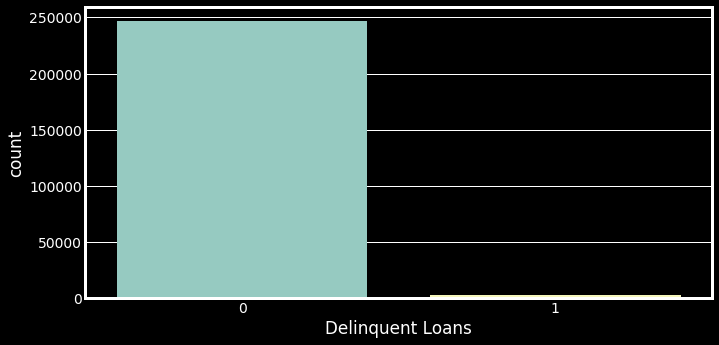

In [34]:
# View amount of loans that were delinquent.
print('How many loans resulted in delinquent status?\n',
      df['dlq'].value_counts())
print('\nWhat % of loans were delinquent?\n',
      df['dlq'].value_counts(normalize=True))

# Set Aesthetics.
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.figure(figsize=(10, 5))
g = sns.countplot(x='dlq', data=df)
g.set_xlabel('Delinquent Loans')
plt.show()

As previously seen, the amount of loans that ended up not being paid on time represents about 1.1% of the dataset & we can conclude the dataset is highly imbalanced.

## Numeric Variables

In [35]:
# Creating variables for plotting.
mean_credit_score = df['credit_score'].mean()
mean_int_rate = df['int_rate'].mean()
mean_ltv_ratio = df['ltv_ratio'].mean()
mean_dti_ratio = df['dti_ratio'].mean()
mean_cltv_ratio = df['cltv_ratio'].mean()
mean_upb = df['unpaid_princ_bal'].mean()
mean_mi = df['mortgage_insurance_pctg'].mean()

std_credit_score = df['credit_score'].std()
std_int_rate = df['int_rate'].std()
std_ltv_ratio = df['ltv_ratio'].std()
std_dti_ratio = df['dti_ratio'].std()
std_cltv_ratio = df['cltv_ratio'].std()
std_upb = df['unpaid_princ_bal'].std()
std_mi = df['mortgage_insurance_pctg'].std()

Text(0,0.5,'')

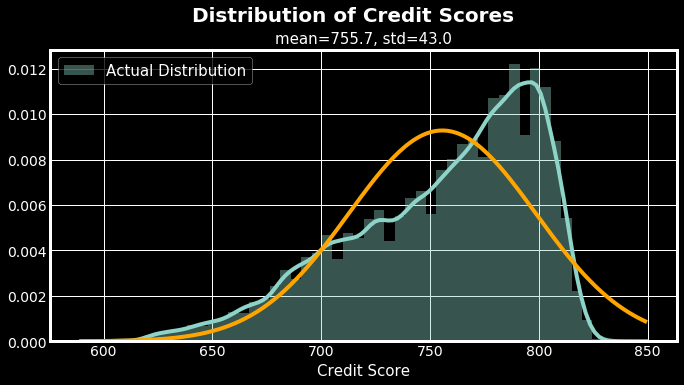

In [36]:
# Set aesthetics.
plt.style.use('dark_background')
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
f.suptitle('Distribution of Credit Scores', weight='bold', size=20, y=1)
ax.set_title('mean=%.1f, std=%.1f'%(mean_credit_score, std_credit_score), size=15)

# Distplot.
sns.distplot(df['credit_score'], fit_kws={'color':'orange'},
             kde=True, fit=norm, label='Actual Distribution')

# Legend.
ax.legend(loc='best', prop={'size':15})

ax.set_xlabel('Credit Score', size=15)
ax.set_ylabel('')

Text(0,0.5,'FICO Score')

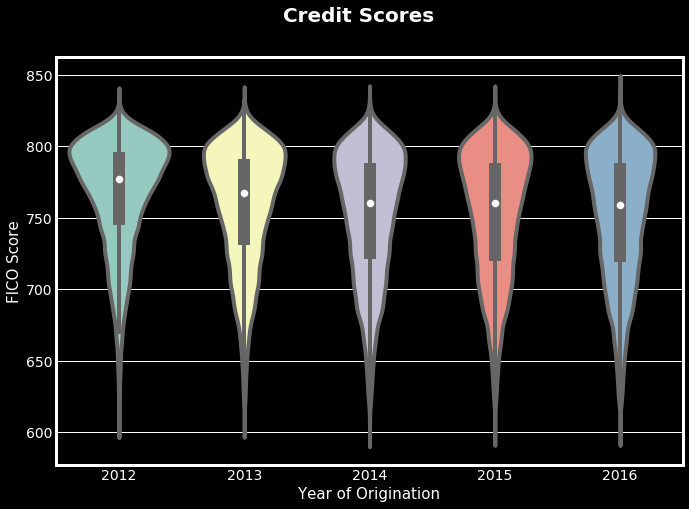

In [37]:
f, ax = plt.subplots(1, 1, figsize=(10, 7))

# Title.
f.suptitle('Credit Scores', fontsize=20, weight='bold')

# Violinplot.
sns.violinplot(data=df, x='year', y='credit_score', ax=ax)

# Axis label.s
ax.set_xlabel('Year of Origination', size=15)
ax.set_ylabel('FICO Score', size=15)

commentary

Text(0,0.5,'')

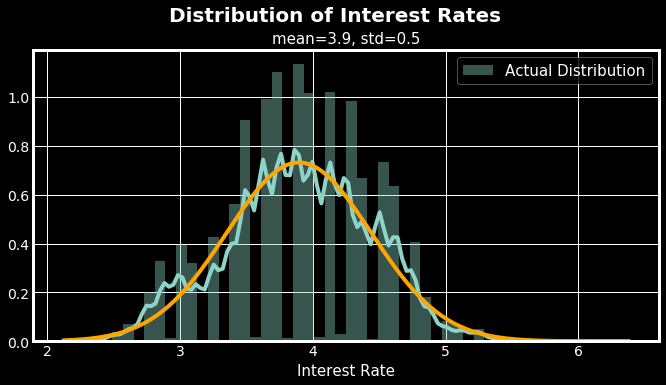

In [38]:
# Set aesthetics.
plt.style.use('dark_background')
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
f.suptitle('Distribution of Interest Rates', weight='bold', size=20, y=1)
ax.set_title('mean=%.1f, std=%.1f'%(mean_int_rate, std_int_rate), size=15)

# Distplot.
sns.distplot(df['int_rate'], fit_kws={'color':'orange'},
             kde=True, fit=norm, label='Actual Distribution')

# Legend.
ax.legend(loc='best', prop={'size':15})

ax.set_xlabel('Interest Rate', size=15)
ax.set_ylabel('')

Text(0,0.5,'Interest Rate')

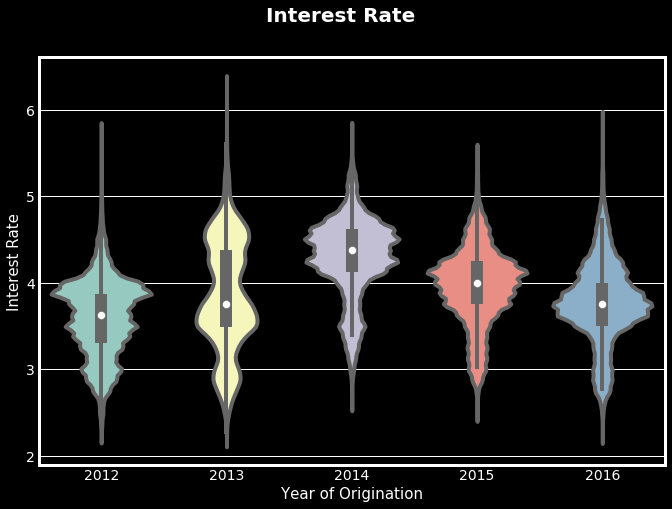

In [39]:
f, ax = plt.subplots(1, 1, figsize=(10, 7))

# Title.
f.suptitle('Interest Rate', fontsize=20, weight='bold')

# Violinplot.
sns.violinplot(data=df, x='year', y='int_rate', ax=ax)

# Axis label.s
ax.set_xlabel('Year of Origination', size=15)
ax.set_ylabel('Interest Rate', size=15)

commentary

Text(0,0.5,'')

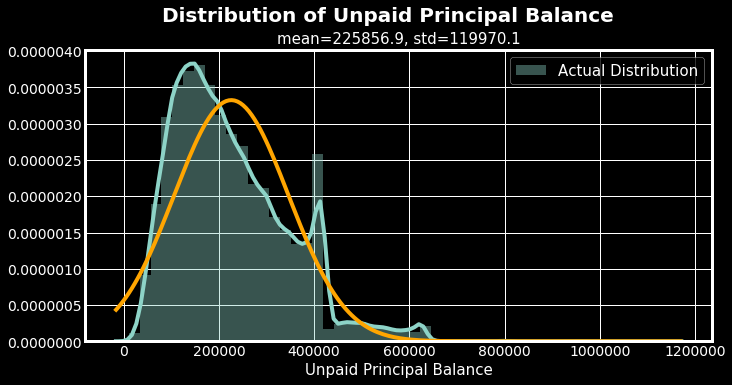

In [40]:
# Set aesthetics.
plt.style.use('dark_background')
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
f.suptitle('Distribution of Unpaid Principal Balance', weight='bold', size=20, y=1)
ax.set_title('mean=%.1f, std=%.1f'%(mean_upb, std_upb), size=15)

# Distplot.
sns.distplot(df['unpaid_princ_bal'], fit_kws={'color':'orange'},
             kde=True, fit=norm, label='Actual Distribution')

# Legend.
ax.legend(loc='best', prop={'size':15})

ax.set_xlabel('Unpaid Principal Balance', size=15)
ax.set_ylabel('')

commentary

Text(0,0.5,'UPB')

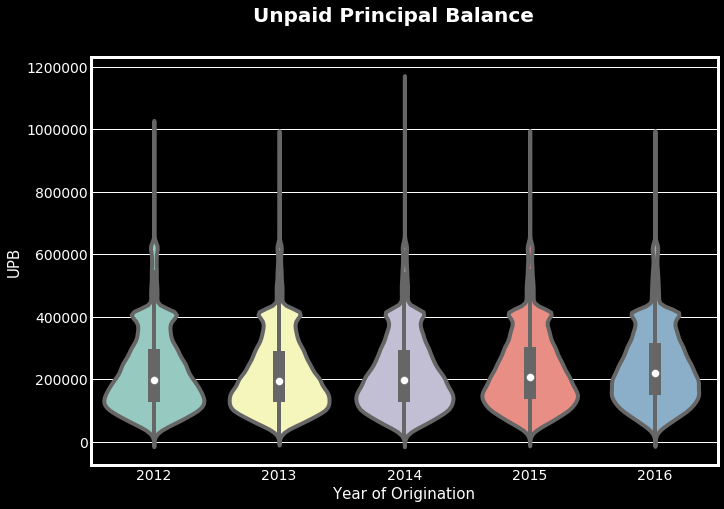

In [41]:
# Look at outliers for upb.
f, ax = plt.subplots(1, 1, figsize=(10, 7))

# Title.
f.suptitle('Unpaid Principal Balance', fontsize=20, weight='bold')

# Violinplot.
sns.violinplot(data=df, x='year', y='unpaid_princ_bal', ax=ax)

# Axis label.s
ax.set_xlabel('Year of Origination', size=15)
ax.set_ylabel('UPB', size=15)

commentary

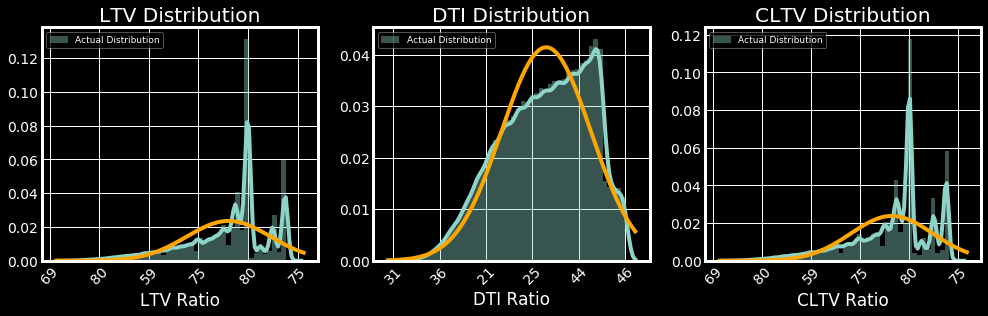

In [42]:
## ltv_ratio, dti_ratio, cltv_ratio
f, axes = plt.subplots(ncols=3, figsize=(15, 4))

# Loan-to-value ratio.
sns.distplot(df['ltv_ratio'], fit_kws={'color':'orange'}, kde=True,
             ax=axes[0], fit=norm, label='Actual Distribution').set_title('LTV Distribution')
axes[0].set_xlabel('LTV Ratio')
axes[0].set_xticklabels(df['ltv_ratio'], rotation=45)
axes[0].legend(loc='best', prop={'size':9})

# Debt-to-income ratio.
sns.distplot(df['dti_ratio'], fit_kws={'color':'orange'}, kde=True,
             ax=axes[1], fit=norm, label='Actual Distribution').set_title('DTI Distribution')
axes[1].set_xlabel('DTI Ratio')
axes[1].set_xticklabels(df['dti_ratio'], rotation=45)
axes[1].legend(loc='best', prop={'size':9})

# Combined loan-to-value ratio.
sns.distplot(df['cltv_ratio'], fit_kws={'color':'orange'}, kde=True,
             ax=axes[2], fit=norm, label='Actual Distribution').set_title('CLTV Distribution')
axes[2].set_xlabel('CLTV Ratio')
axes[2].set_xticklabels(df['cltv_ratio'], rotation=45)
axes[2].legend(loc='best', prop={'size':9})

commentary

Text(0,0.5,'Count')

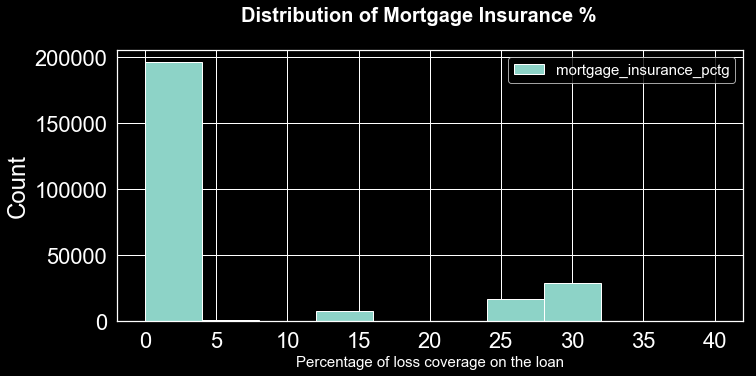

In [162]:
# Set aesthetics.
plt.style.use('dark_background')
f, ax = plt.subplots(ncols=1, figsize=(10, 5))
f.suptitle('Distribution of Mortgage Insurance %', weight='bold', size=20, y=1)

# Histogram.
ax.hist(df['mortgage_insurance_pctg'])

# Legend.
ax.legend(loc='best', prop={'size':15})

ax.set_xlabel('Percentage of loss coverage on the loan', size=15)
ax.set_ylabel('Count')

Mortgage Insurance Percentage (MI%) only ranges from 1%-55%. This represents the percentage of loss coverage on the loan, at the time of Freddie Mac's purchase of the mortgage loan that a mortgage insurer is providing to cover losses incurred as a result of a default on the loan.

### Skewed Distributions Check
Log transformation distplots for numeric variables: <br>
1. Credit Score
2. Interest Rate
3. LTV Ratio
4. DTI Ratio
5. CLTV Ratio
6. Unpaid Principal Balance

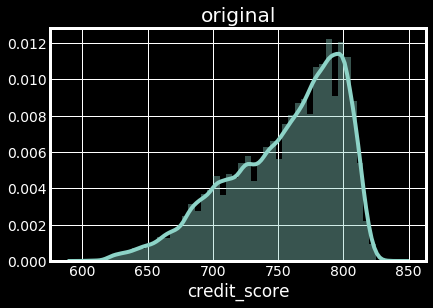

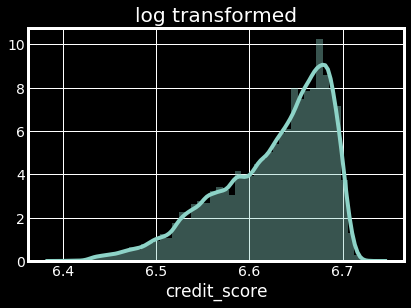

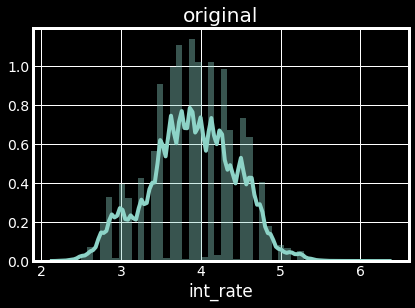

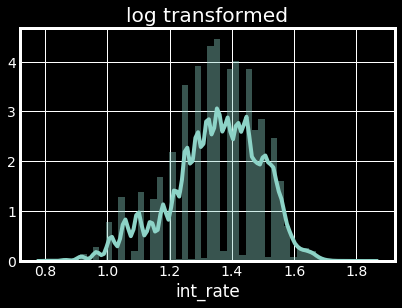

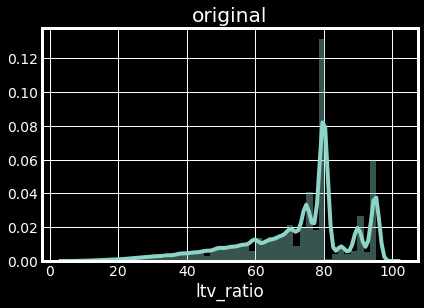

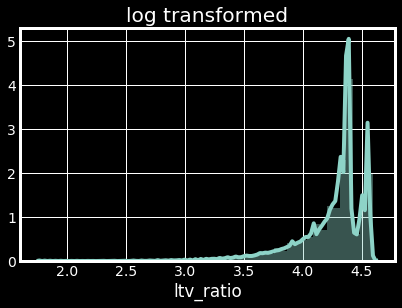

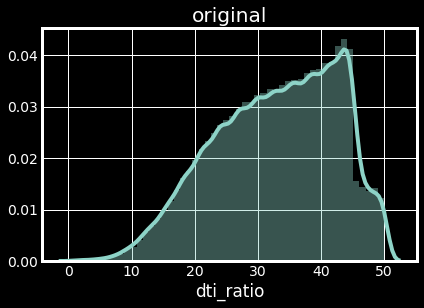

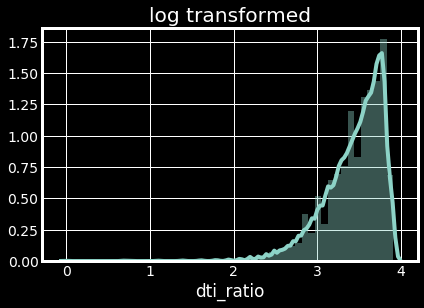

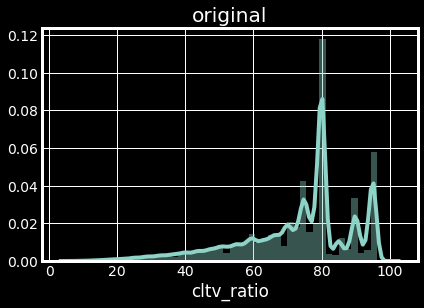

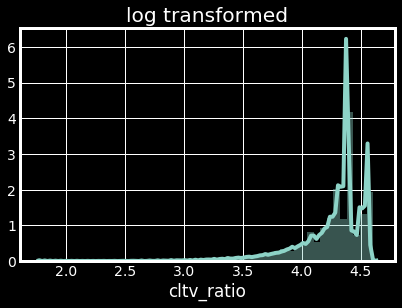

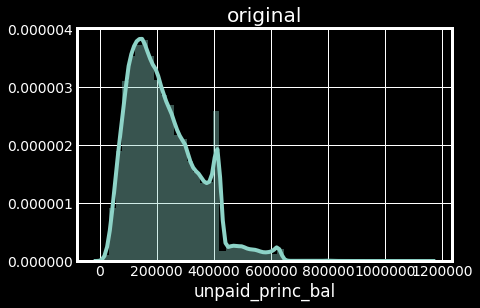

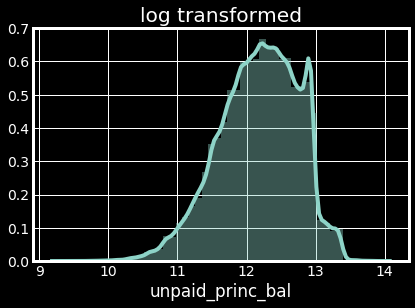

In [44]:
sns.distplot(df['credit_score'])
plt.title('original')
plt.show()
sns.distplot(np.log(df['credit_score']))
plt.title('log transformed')
plt.show()

sns.distplot(df['int_rate'])
plt.title('original')
plt.show()
sns.distplot(np.log(df['int_rate']))
plt.title('log transformed')
plt.show()

sns.distplot(df['ltv_ratio'])
plt.title('original')
plt.show()
sns.distplot(np.log(df['ltv_ratio']))
plt.title('log transformed')
plt.show()

sns.distplot(df['dti_ratio'])
plt.title('original')
plt.show()
sns.distplot(np.log(df['dti_ratio']))
plt.title('log transformed')
plt.show()

sns.distplot(df['cltv_ratio'])
plt.title('original')
plt.show()
sns.distplot(np.log(df['cltv_ratio']))
plt.title('log transformed')
plt.show()

sns.distplot(df['unpaid_princ_bal'])
plt.title('original')
plt.show()
sns.distplot(np.log(df['unpaid_princ_bal']))
plt.title('log transformed')
plt.show()

commentary

## Categorical Variables

Text(81.7,0.5,'Purpose of Loan: Purchase, Cash-out, No Cash-out')

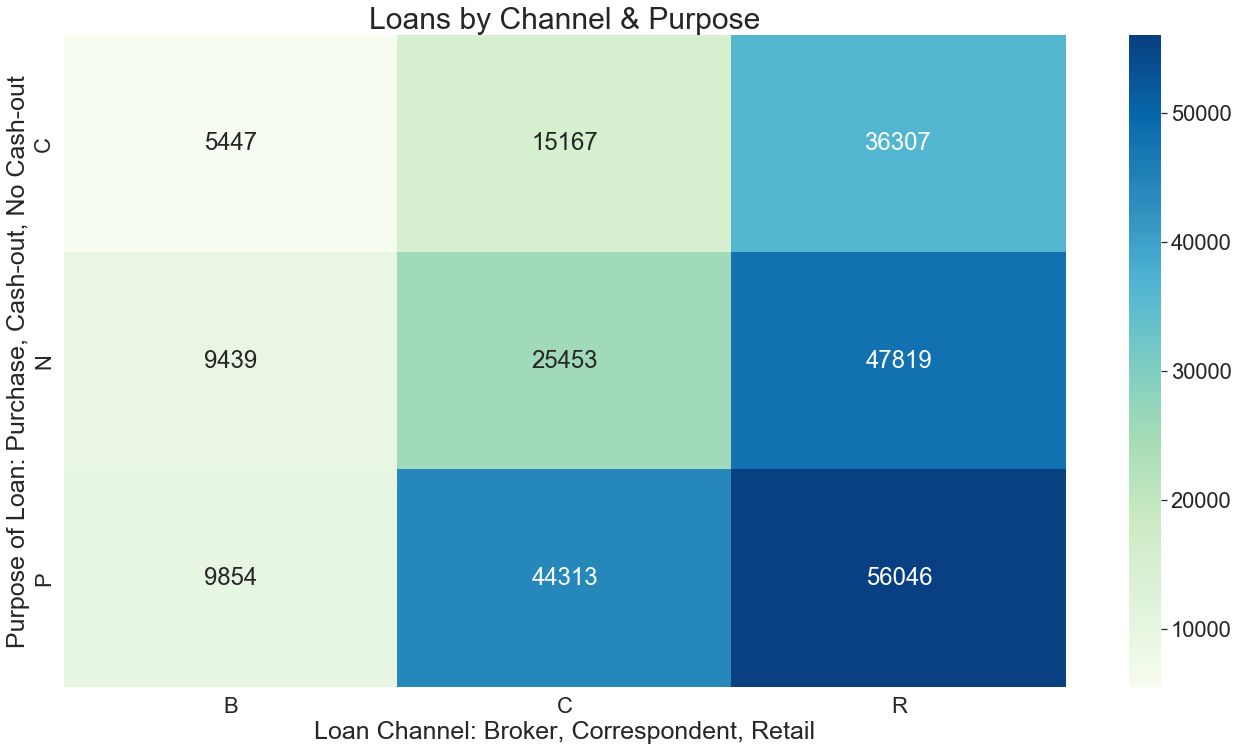

In [160]:
# Loan Purpose & Channel.

# Create a new dataframe for heatmap.
chnl_purp = pd.DataFrame()
chnl_purp = df.groupby(['channel', 'loan_purpose']).size().sort_values()
df_chnl_purp = chnl_purp.unstack()


# Aesthetics.
sns.set_style('white')
plt.figure(figsize=(20, 12))
sns.set(font_scale=2)

# Heatmap.
g = sns.heatmap(df_chnl_purp.T, mask = df_chnl_purp.T.isnull(),
                annot=True, fmt='d', cmap='GnBu')

# Title & axis labels.
plt.title('Loans by Channel & Purpose', size=30)
plt.xlabel('Loan Channel: Broker, Correspondent, Retail', size=25)
plt.ylabel('Purpose of Loan: Purchase, Cash-out, No Cash-out', size=25)

commentary

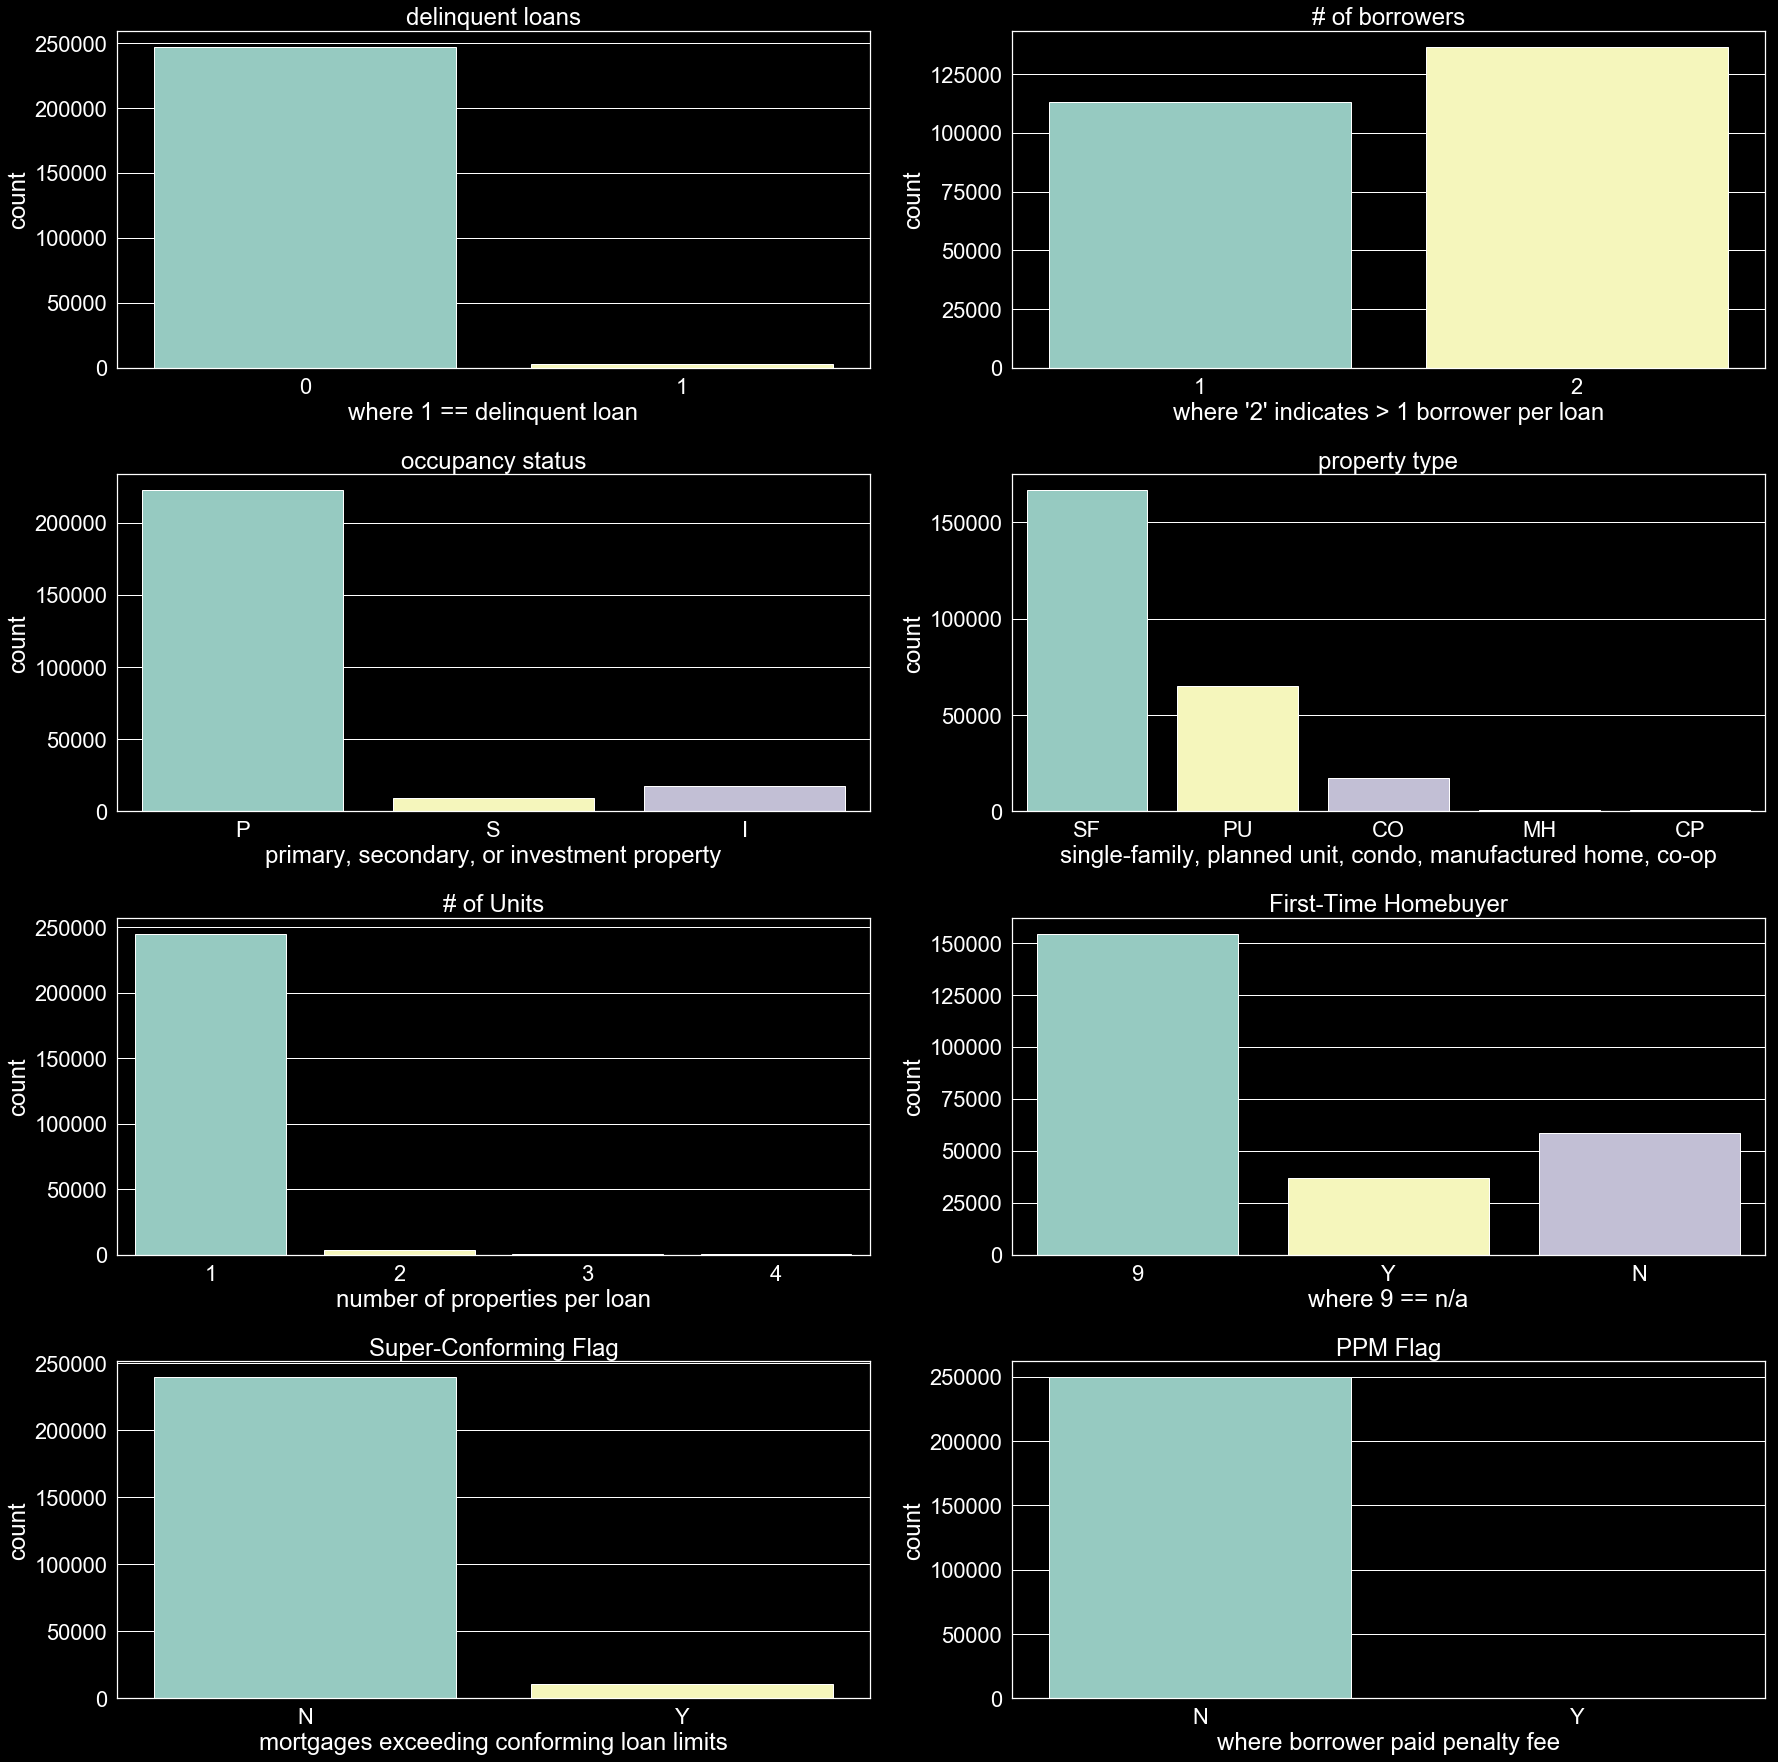

In [163]:
# Aesthetics.
fig = plt.figure(figsize=(50, 25))
plt.style.use('dark_background')

# Delinquent Loan.
ax1 = plt.subplot2grid((4, 4), (0, 0))
sns.countplot(df['dlq']).set_title('delinquent loans')
ax1.set_xlabel('where 1 == delinquent loan')

# Number of Borrowers per loan.
ax1 = plt.subplot2grid((4, 4), (0, 1))
sns.countplot(df['no_of_borrowers']).set_title('# of borrowers')
ax1.set_xlabel("where '2' indicates > 1 borrower per loan")

# Occupancy Status.
ax1 = plt.subplot2grid((4, 4), (1, 0))
sns.countplot(df['occupancy_status']).set_title('occupancy status')
ax1.set_xlabel('primary, secondary, or investment property')

# Property Type.
ax1 = plt.subplot2grid((4, 4), (1, 1))
sns.countplot(df['prop_type']).set_title('property type')
ax1.set_xlabel('single-family, planned unit, condo, manufactured home, co-op')

# Number of Properties per loan.
ax1 = plt.subplot2grid((4, 4), (2, 0))
sns.countplot(df['no_of_units']).set_title('# of Units')
ax1.set_xlabel('number of properties per loan')

# First Home Flag.
ax1 = plt.subplot2grid((4, 4), (2, 1))
sns.countplot(df['first_home_flag']).set_title('First-Time Homebuyer')
ax1.set_xlabel('where 9 == n/a')

# Super-Conforming Flag.
ax1 = plt.subplot2grid((4, 4), (3, 0))
sns.countplot(df['super_conform_flag']).set_title('Super-Conforming Flag')
ax1.set_xlabel('mortgages exceeding conforming loan limits')

# PPM Flag.
ax1 = plt.subplot2grid((4, 4), (3, 1))
sns.countplot(df['ppm_flag']).set_title('PPM Flag')
ax1.set_xlabel('where borrower paid penalty fee')

# Aesthetics (additional).
plt.tight_layout()

commentary

Top 10 Sellers of Mortgages to Freddie Mac
 Other sellers           87428
WELLSFARGOBANK,NA       38158
USBANKNA                19985
JPMORGANCHASEBANK,NA    15549
BANKOFAMERICA,NA        13269
BRANCHBANKING&TRUSTC    12963
QUICKENLOANINC           8490
CALIBERHOMELOANS,INC     4778
PROVIDENTFUNDINGASSO     4272
FRANKLINAMERICANMTGE     4213
Name: seller, dtype: int64


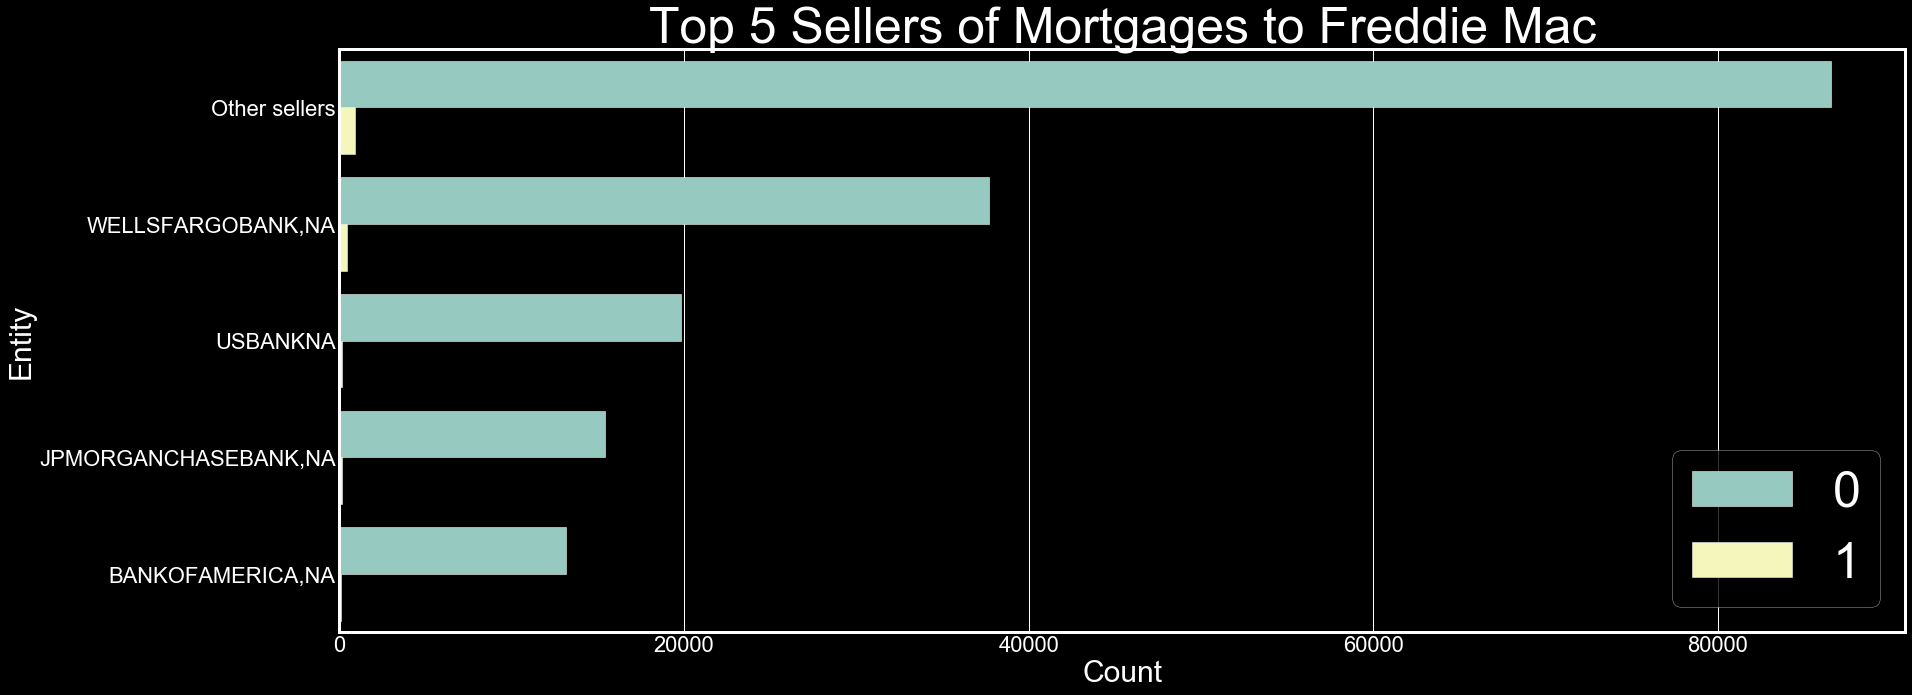

Top 10 Servicers of Mortgages to Freddie Mac
 Other servicers         72956
WELLSFARGOBANK,NA       38144
USBANKNA                21904
JPMORGANCHASEBANK,NA    15702
BANKOFAMERICA,NA        13239
BRANCHBANKING&TRUSTC    13046
QUICKENLOANINC           8558
PNCBANK,NATL             7700
CALIBERHOMELOANS,INC     5784
NEWRESIDENTIALMTGELL     5328
Name: servicer, dtype: int64


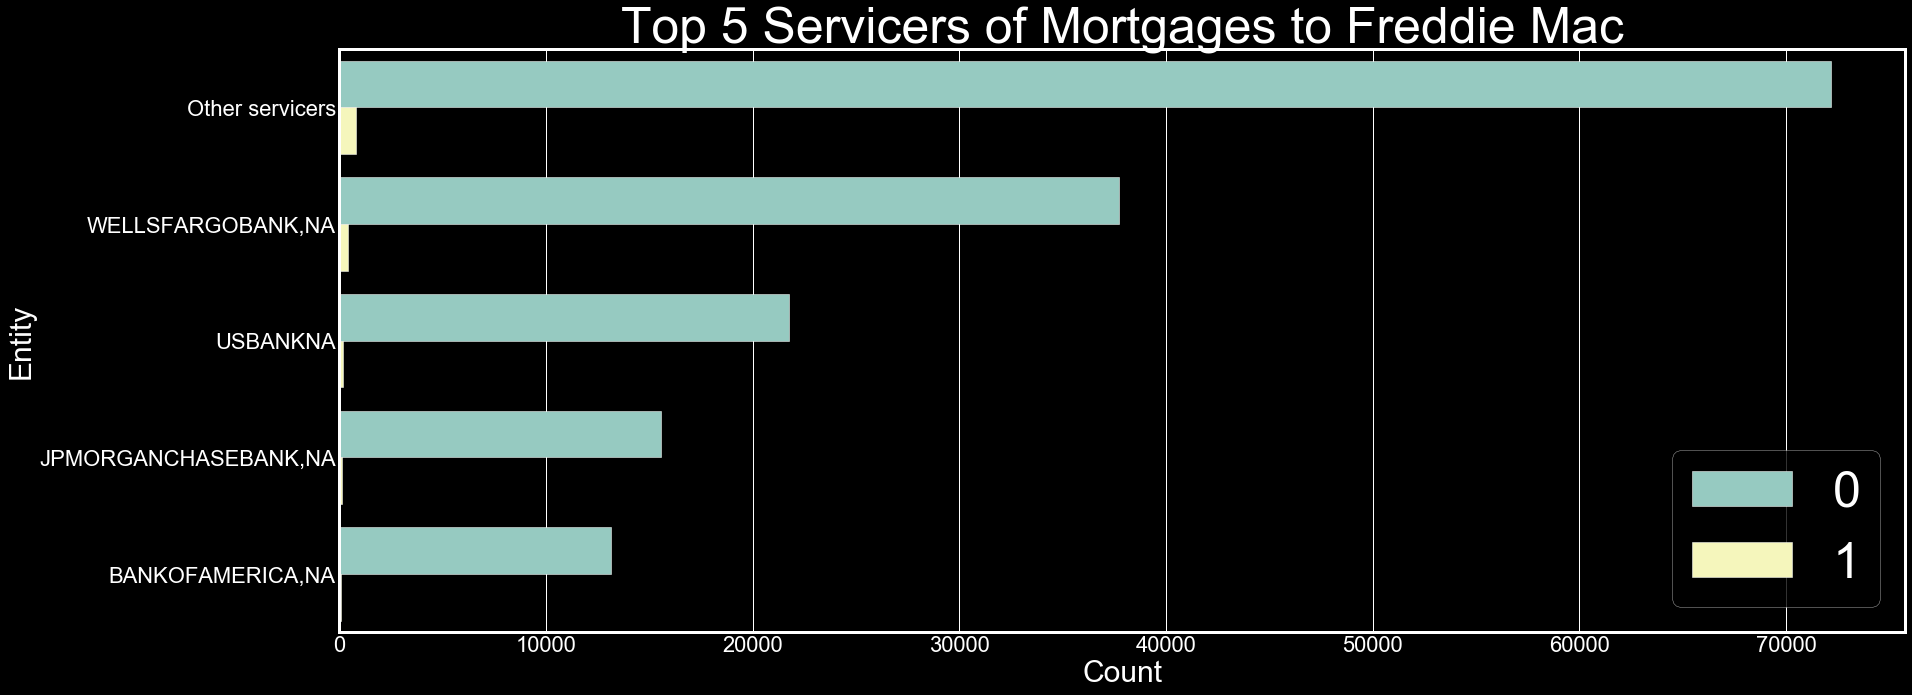

In [47]:
# Sizing & style.
plt.figure(figsize=(25, 10))
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

# Sellers.
# Countplot.
g1 = sns.countplot(y='seller', hue='dlq', data=df,
              order=df.seller.value_counts().iloc[:5].index)

# Aesthetics.
plt.title('Top 5 Sellers of Mortgages to Freddie Mac', size=50)
plt.xlabel('Count', size=30)
plt.ylabel('Entity', size=30)
plt.legend(fontsize=50)
print('Top 10 Sellers of Mortgages to Freddie Mac\n',
       df['seller'].value_counts().head(10))
plt.show()

# Servicers.

# Sizing.
plt.figure(figsize=(25, 10))

# Countplot.
g2 = sns.countplot(y='servicer', hue='dlq', data=df,
              order=df.servicer.value_counts().iloc[:5].index)

# Aesthetics.
plt.title('Top 5 Servicers of Mortgages to Freddie Mac', size=50)
plt.xlabel('Count', size=30)
plt.ylabel('Entity', size=30)
plt.legend(fontsize=50)
print('Top 10 Servicers of Mortgages to Freddie Mac\n',
       df['servicer'].value_counts().head(10))
plt.show()

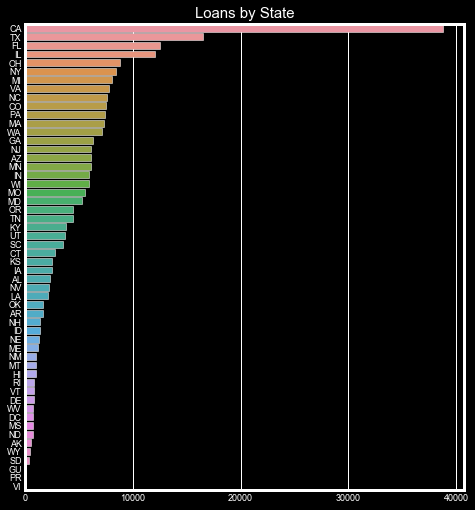

In [48]:
# Geographic distribution.

# Sizing & style.
plt.figure(figsize=(7, 8))
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

# Countplot.
sns.countplot(y='state', data=df,
              order=df.state.value_counts().iloc[:55].index)

# Aesthetics.
plt.title('Loans by State', size=15)
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.show()

# Model Prep

* Feature Engineering: log, sqrt, drop
* Scaling
* Under-Sampling
* Dummies
* Corre
* Assign X & Y
* PCA
* Split to Train and Test Sets

## Scaling Numerical Variables

In [49]:
# Copy dataframe.
scaled_df = df.copy()

# Ignore warning.
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Scaling numerical features.
scaled_df = df.copy()
scaler = StandardScaler()
scaled_df['credit_score_sc'] = scaler.fit_transform(scaled_df['credit_score'].values.reshape(-1, 1))
scaled_df['int_rate_sc'] = scaler.fit_transform(scaled_df['int_rate'].values.reshape(-1, 1))
scaled_df['ltv_sc'] = scaler.fit_transform(scaled_df['ltv_ratio'].values.reshape(-1, 1))
scaled_df['dti_sc'] = scaler.fit_transform(scaled_df['dti_ratio'].values.reshape(-1, 1))
scaled_df['cltv_sc'] = scaler.fit_transform(scaled_df['cltv_ratio'].values.reshape(-1, 1))
scaled_df['upb_sc'] = scaler.fit_transform(scaled_df['unpaid_princ_bal'].values.reshape(-1, 1))
scaled_df['mi_sc'] = scaler.fit_transform(scaled_df['mortgage_insurance_pctg'].values.reshape(-1, 1))

# Removing unscaled numerical features.
scaled_df.drop(['credit_score', 'int_rate', 'ltv_ratio', 'dti_ratio', 'cltv_ratio',
                'unpaid_princ_bal', 'mortgage_insurance_pctg'], axis=1, inplace=True)

# Removing irrelevant cols.
scaled_df = scaled_df.drop(['lsn', 'loan_term', 'maturity_date',
                            'first_pmt_date', 'year', 'state'], axis=1)

# View.
scaled_df.head()

,dlq,loan_purpose,no_of_units,occupancy_status,no_of_borrowers,first_home_flag,super_conform_flag,ppm_flag,prop_type,channel,seller,servicer,credit_score_sc,int_rate_sc,ltv_sc,dti_sc,cltv_sc,upb_sc,mi_sc
0,0,C,1,P,2,9,N,N,SF,R,Other sellers,Other servicers,1.357969,0.191651,-0.898305,0.314742,-0.945498,-1.024064,-0.504681
1,0,P,1,S,2,9,N,N,SF,R,Other sellers,"PNCBANK,NATL",-0.247916,0.191651,-0.188823,-0.204746,-0.229958,1.593259,-0.504681
2,0,C,1,P,2,9,N,N,SF,R,Other sellers,Other servicers,-1.132317,1.109785,0.461535,0.314742,0.425953,-0.665641,-0.504681
3,0,N,1,P,2,9,N,N,SF,R,Other sellers,Other servicers,-1.015948,0.191651,-0.780058,-1.243723,-0.826242,1.293184,-0.504681
4,0,N,1,I,2,9,N,N,SF,R,Other sellers,Other servicers,0.636484,0.650718,0.165918,-0.828132,0.127812,-1.190773,-0.504681


## Class Imbalance
The target variable 'dlq' is heavily skewed, so we must create sub-samples or risk overfitting the models.

In [50]:
# Review the imbalance.
print('What % of loans end up in default?\n', scaled_df['dlq'].value_counts(normalize=True))
print('\nNumerical count:\n', scaled_df['dlq'].value_counts())

What % of loans end up in default?
 0    0.989441
1    0.010559
Name: dlq, dtype: float64

Numerical count:
 0    247207
1      2638
Name: dlq, dtype: int64


In [51]:
# Assign variable for 'dlq' == 1.
dlq_count = len(scaled_df.loc[scaled_df['dlq'] == 1])

# Creating dataframes for merge, where dlq == 0 & dlq == 1.
sample_df = scaled_df.sample(frac=1) #Returns random sample of items from an axis of object.
df_0 = sample_df.loc[sample_df['dlq'] == 0][:dlq_count] #Includes all indexes with instances of dlq.
df_1 = sample_df.loc[sample_df['dlq'] == 1] #dlq df.

# Combine instances of default & non-default.
sample_model_df = pd.concat([df_0, df_1])

# Return random sample.
sample_model_df = sample_model_df.sample(frac=1, random_state=42)
sample_model_df.head()

,dlq,loan_purpose,no_of_units,occupancy_status,no_of_borrowers,first_home_flag,super_conform_flag,ppm_flag,prop_type,channel,seller,servicer,credit_score_sc,int_rate_sc,ltv_sc,dti_sc,cltv_sc,upb_sc,mi_sc
24858,0,C,1,P,2,9,N,N,PU,R,"BANKOFAMERICA,NA","BANKOFAMERICA,NA",-0.271190,1.339318,0.165918,-0.724234,0.127812,1.351532,-0.504681
5983,0,N,1,S,2,9,N,N,CO,R,Other sellers,Other servicers,0.845948,-0.037883,-1.016552,-0.412541,-1.064755,0.351281,-0.504681
39578,1,P,1,P,1,Y,N,N,PU,R,"CALIBERHOMELOANS,INC","CALIBERHOMELOANS,INC",-2.552012,2.027919,0.461535,0.938128,0.425953,-0.857356,-0.504681
47812,1,C,1,P,1,9,N,N,SF,R,Other sellers,Other servicers,1.008863,-0.267416,-0.188823,1.145924,-0.229958,-0.340559,-0.504681
47120,0,N,1,P,1,9,N,N,PU,C,"WELLSFARGOBANK,NA","WELLSFARGOBANK,NA",-0.364285,-0.496950,0.993646,0.106947,0.962608,0.267927,1.782456


In [52]:
print('Where 0 == non-delinquent')
print('and 1 == delinquent:\n')
print('The number of indexes within the model_df is:')
print(sample_model_df['dlq'].value_counts())

Where 0 == non-delinquent
and 1 == delinquent:

The number of indexes within the model_df is:
1    2638
0    2638
Name: dlq, dtype: int64


## Categorical Variables: Generating Dummy Variables 

In [53]:
# SKLearn requires independent variables to be numeric.
model_dummies = pd.get_dummies(sample_model_df)
print(model_dummies.shape)
model_dummies.head()

(5276, 116)


,dlq,no_of_units,no_of_borrowers,credit_score_sc,int_rate_sc,ltv_sc,dti_sc,cltv_sc,upb_sc,mi_sc,...,servicer_RUSHMORELOANMANAGEME,"servicer_SENECAMTGESERVICING,",servicer_SPECIALIZEDLOANSERVI,"servicer_STEARNSLENDING,LLC","servicer_SUNTRUSTMORTGAGE,INC",servicer_UNIONSAVINGSBANK,servicer_UNITEDSHOREFINANCIAL,servicer_USAAFEDSAVINGSBANK,servicer_USBANKNA,"servicer_WELLSFARGOBANK,NA"
24858,0,1,2,-0.271190,1.339318,0.165918,-0.724234,0.127812,1.351532,-0.504681,...,0,0,0,0,0,0,0,0,0,0
5983,0,1,2,0.845948,-0.037883,-1.016552,-0.412541,-1.064755,0.351281,-0.504681,...,0,0,0,0,0,0,0,0,0,0
39578,1,1,1,-2.552012,2.027919,0.461535,0.938128,0.425953,-0.857356,-0.504681,...,0,0,0,0,0,0,0,0,0,0
47812,1,1,1,1.008863,-0.267416,-0.188823,1.145924,-0.229958,-0.340559,-0.504681,...,0,0,0,0,0,0,0,0,0,0
47120,0,1,1,-0.364285,-0.496950,0.993646,0.106947,0.962608,0.267927,1.782456,...,0,0,0,0,0,0,0,0,0,1


In [59]:
model_dummies.columns

Index(['dlq', 'no_of_units', 'no_of_borrowers', 'credit_score_sc',
       'int_rate_sc', 'ltv_sc', 'dti_sc', 'cltv_sc', 'upb_sc', 'mi_sc',
       ...
       'servicer_RUSHMORELOANMANAGEME', 'servicer_SENECAMTGESERVICING,',
       'servicer_SPECIALIZEDLOANSERVI', 'servicer_STEARNSLENDING,LLC',
       'servicer_SUNTRUSTMORTGAGE,INC', 'servicer_UNIONSAVINGSBANK',
       'servicer_UNITEDSHOREFINANCIAL', 'servicer_USAAFEDSAVINGSBANK',
       'servicer_USBANKNA', 'servicer_WELLSFARGOBANK,NA'],
      dtype='object', length=116)

## Correlations

In [54]:
# Instantiating correlation matrix.
corrmat = model_dummies.corr()
corrmat.head()

,dlq,no_of_units,no_of_borrowers,credit_score_sc,int_rate_sc,ltv_sc,dti_sc,cltv_sc,upb_sc,mi_sc,...,servicer_RUSHMORELOANMANAGEME,"servicer_SENECAMTGESERVICING,",servicer_SPECIALIZEDLOANSERVI,"servicer_STEARNSLENDING,LLC","servicer_SUNTRUSTMORTGAGE,INC",servicer_UNIONSAVINGSBANK,servicer_UNITEDSHOREFINANCIAL,servicer_USAAFEDSAVINGSBANK,servicer_USBANKNA,"servicer_WELLSFARGOBANK,NA"
dlq,1.000000,-0.012426,-0.206712,-0.440482,0.250819,0.141081,0.186382,0.136580,-0.085215,0.120045,...,-0.018479,0.016501,0.009742,-0.012021,-0.055622,-0.019485,-0.006160,-0.013772,-0.047702,0.026910
no_of_units,-0.012426,1.000000,-0.008277,0.015182,0.082934,-0.069827,-0.008682,-0.074368,0.072651,-0.068333,...,-0.003663,-0.012429,-0.004635,0.001822,-0.015668,-0.004635,-0.003663,-0.003276,-0.004288,-0.008388
no_of_borrowers,-0.206712,-0.008277,1.000000,0.047753,-0.129661,-0.038667,-0.104597,-0.031879,0.162671,-0.019355,...,-0.002791,0.024471,-0.015293,-0.003319,0.005734,0.004310,-0.002791,0.030759,0.008254,-0.000385
credit_score_sc,-0.440482,0.015182,0.047753,1.000000,-0.302548,-0.080953,-0.171898,-0.077707,0.069532,-0.048041,...,0.011633,0.007310,0.027322,-0.008597,0.044963,0.033644,0.011018,0.003227,0.023918,-0.000943
int_rate_sc,0.250819,0.082934,-0.129661,-0.302548,1.000000,0.258080,0.183648,0.251104,-0.018230,0.176896,...,-0.001663,0.020914,-0.020785,0.056956,-0.016966,-0.038366,-0.010000,-0.040323,-0.054546,0.014860


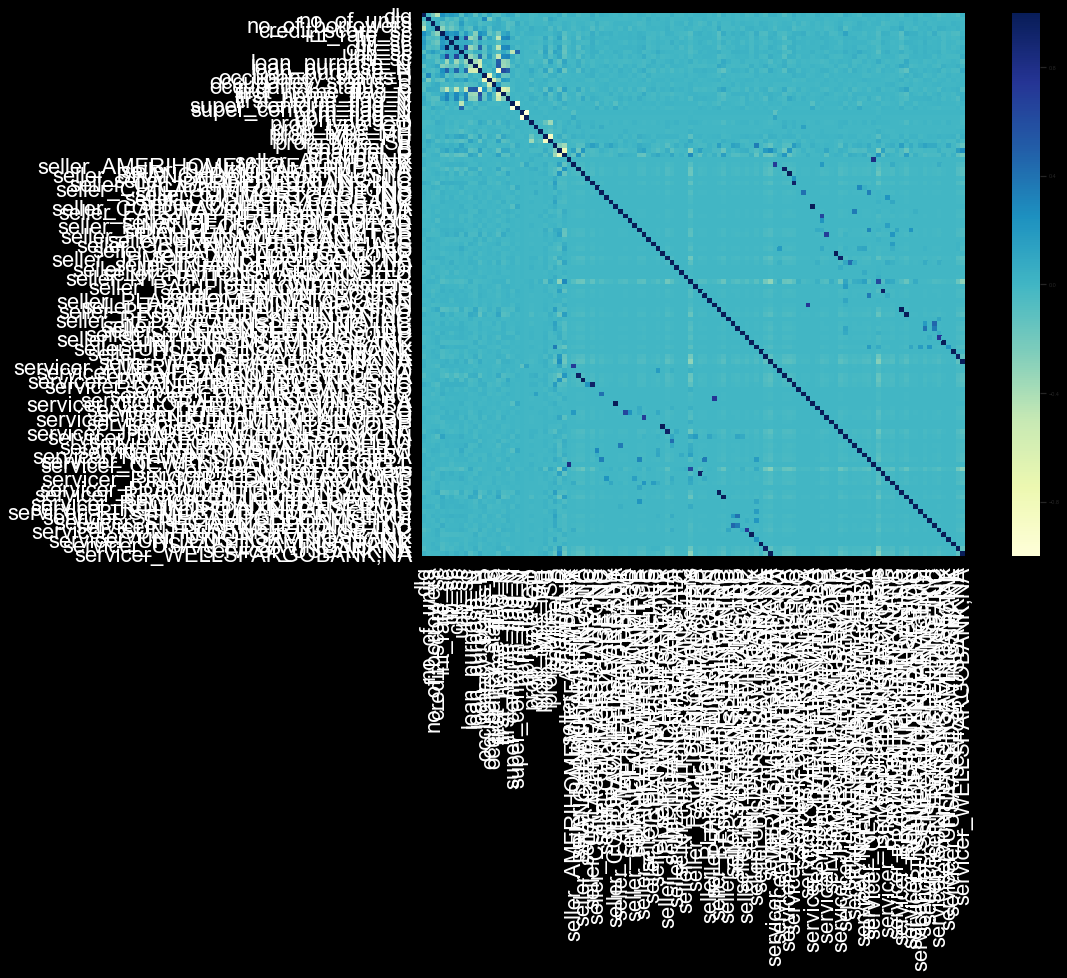

In [195]:
# View. 
f, ax = plt.subplots(figsize = (15, 10))
sns.set(font_scale=.5)
#sns.heatmap(corrmat, vmax=1.0, cmap='YlGnBu', square=True, xticklabels=False, yticklabels=False)
sns.heatmap(corrmat, vmax=1.0, cmap='YlGnBu', square=True, xticklabels=True, yticklabels=True)
plt.show()

## model_df

In [63]:
# Rename for modelling.
model_df = model_dummies
model_df.head()

,dlq,no_of_units,no_of_borrowers,credit_score_sc,int_rate_sc,ltv_sc,dti_sc,cltv_sc,upb_sc,mi_sc,...,servicer_RUSHMORELOANMANAGEME,"servicer_SENECAMTGESERVICING,",servicer_SPECIALIZEDLOANSERVI,"servicer_STEARNSLENDING,LLC","servicer_SUNTRUSTMORTGAGE,INC",servicer_UNIONSAVINGSBANK,servicer_UNITEDSHOREFINANCIAL,servicer_USAAFEDSAVINGSBANK,servicer_USBANKNA,"servicer_WELLSFARGOBANK,NA"
24858,0,1,2,-0.271190,1.339318,0.165918,-0.724234,0.127812,1.351532,-0.504681,...,0,0,0,0,0,0,0,0,0,0
5983,0,1,2,0.845948,-0.037883,-1.016552,-0.412541,-1.064755,0.351281,-0.504681,...,0,0,0,0,0,0,0,0,0,0
39578,1,1,1,-2.552012,2.027919,0.461535,0.938128,0.425953,-0.857356,-0.504681,...,0,0,0,0,0,0,0,0,0,0
47812,1,1,1,1.008863,-0.267416,-0.188823,1.145924,-0.229958,-0.340559,-0.504681,...,0,0,0,0,0,0,0,0,0,0
47120,0,1,1,-0.364285,-0.496950,0.993646,0.106947,0.962608,0.267927,1.782456,...,0,0,0,0,0,0,0,0,0,1


### Assign X & Y

In [64]:
# Assign vars for target & features.
feature_cols = model_df.iloc[:, 1:].columns
target = model_df['dlq']

### Split to train & test sets

In [69]:
# 75/25 train/test split.
train, test = train_test_split(model_df, test_size=0.25, random_state = 42)
X_test = test[feature_cols]
Y_test = test['dlq']
X_train = train[feature_cols]
Y_train = train['dlq']

# Models

## KNN Classifier

In [85]:
# Defining the KNN classifier function.
def run_knn(num_folds, num_neighbors, set_weights, set_knnAlgo):
    start_time = time.time()
    # Declare the model.
    knn = KNeighborsClassifier(n_neighbors=num_neighbors, weights=set_weights, algorithm=set_knnAlgo)
    # Fit the model.
    knn.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = knn.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(knn, X_train, Y_train, cv=num_folds)
    cvScoreTest = cross_val_score(knn, X_test, Y_test, cv=num_folds)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(knn.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(knn.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTest.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))

In [97]:
run_knn(10, 10, 'uniform', 'auto')

Time taken: 2.6 seconds

Training Set Accuracy:
0.7419762446297701

Testing Set Accuracy:
0.6967399545109931

Cross-Val Train Acc: 0.68 (+/- 0.08)

Cross-Val Test Acc: 0.66 (+/- 0.08)

Confusion Matrix:
[[487 167]
 [233 432]]


## Random Forest Classifier

In [143]:
def run_rfc(num_folds):
    start_time = time.time()
    # Declare the model.
    rfc = RandomForestClassifier()
    # Fit the model.
    rfc.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = rfc.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(rfc, X_train, Y_train, cv=num_folds)
    cvScoreTest = cross_val_score(rfc, X_test, Y_test, cv=num_folds)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(rfc.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(rfc.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTest.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))    

In [144]:
run_rfc(10)

Time taken: 0.7 seconds

Training Set Accuracy:
0.980793530452363

Testing Set Accuracy:
0.6921910538286581

Cross-Val Train Acc: 0.67 (+/- 0.05)

Cross-Val Test Acc: 0.66 (+/- 0.05)

Confusion Matrix:
[[495 159]
 [247 418]]


## RFC & PCA

## Logistic Regression

In [106]:
def run_logisticRegr(num_folds):
    start_time = time.time()
    # Declare the model.
    lr = LogisticRegression(max_iter=20)
    # Fit the model.
    lr.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = lr.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(lr, X_train, Y_train, cv=num_folds)
    cvScoreTest = cross_val_score(lr, X_test, Y_test, cv=num_folds)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(lr.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(lr.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTest.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))    

In [107]:
run_logisticRegr(10)

Time taken: 0.4 seconds

Training Set Accuracy:
0.733131159969674

Testing Set Accuracy:
0.7391963608794542

Cross-Val Train Acc: 0.72 (+/- 0.07)

Cross-Val Test Acc: 0.72 (+/- 0.07)

Confusion Matrix:
[[489 165]
 [179 486]]


## Logistic Regression & RFE

## Ridge Regression

In [124]:
def run_ridgeRegr(num_folds):
    start_time = time.time()
    # Declare the model.
    ridge = LogisticRegression(penalty='l2', C=0.1)
    # Fit the model.
    ridge.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = ridge.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(ridge, X_train, Y_train, cv=num_folds)
    cvScoreTest = cross_val_score(ridge, X_test, Y_test, cv=num_folds)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(ridge.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(ridge.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTest.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred)) 

In [125]:
run_ridgeRegr(10)

Time taken: 0.3 seconds

Training Set Accuracy:
0.7290876926964872

Testing Set Accuracy:
0.7338893100833965

Cross-Val Train Acc: 0.72 (+/- 0.06)

Cross-Val Test Acc: 0.73 (+/- 0.06)

Confusion Matrix:
[[488 166]
 [185 480]]


## Lasso Regression

In [140]:
def run_lassoRegr(num_folds):
    start_time = time.time()
    # Declare the model.
    lasso = LogisticRegression(penalty='l1', C=1)
    # Fit the model.
    lasso.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = lasso.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(lasso, X_train, Y_train, cv=num_folds)
    cvScoreTest = cross_val_score(lasso, X_test, Y_test, cv=num_folds)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(lasso.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(lasso.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTest.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))

In [141]:
run_lassoRegr(10)

Time taken: 0.7 seconds

Training Set Accuracy:
0.7318675764468031

Testing Set Accuracy:
0.7361637604245641

Cross-Val Train Acc: 0.72 (+/- 0.07)

Cross-Val Test Acc: 0.73 (+/- 0.07)

Confusion Matrix:
[[490 164]
 [184 481]]


## Support Vector Classifier

In [145]:
def run_svc(num_folds):
    start_time = time.time()
    # Declare the model.
    svc = SVC()
    # Fit the model.
    svc.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = svc.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(svc, X_train, Y_train, cv=num_folds)
    cvScoreTest = cross_val_score(svc, X_test, Y_test, cv=num_folds)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(svc.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(svc.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTest.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))

In [146]:
run_svc(10)

Time taken: 18.2 seconds

Training Set Accuracy:
0.730098559514784

Testing Set Accuracy:
0.7384382107657316

Cross-Val Train Acc: 0.72 (+/- 0.06)

Cross-Val Test Acc: 0.73 (+/- 0.06)

Confusion Matrix:
[[493 161]
 [184 481]]


## Gradient Boost

In [152]:
def run_gb(num_folds, num_iterat, max_depth_p, loss_func):
    start_time = time.time()
    # Declare the model.
    clf = GradientBoostingClassifier(loss=loss_func, n_estimators=num_iterat, max_depth = max_depth_p)
    # Fit the model.
    clf.fit(X_train, Y_train)
    # Classify, storing the result in a new variable.
    y_pred = clf.predict(X_test)
    # Cross-Validation.
    cvScoreTrain = cross_val_score(clf, X_train, Y_train, cv=num_folds)
    cvScoreTest = cross_val_score(clf, X_test, Y_test, cv=num_folds)
    # Display.
    print('Time taken: {} seconds'.format('%.1f' % (time.time() - start_time)))
    print('\nTraining Set Accuracy:')
    print(clf.score(X_train, Y_train))
    print('\nTesting Set Accuracy:')
    print(clf.score(X_test, Y_test))
    print('\nCross-Val Train Acc: %0.2f (+/- %0.2f)' % (cvScoreTrain.mean(), cvScoreTest.std() * 2))
    print('\nCross-Val Test Acc: %0.2f (+/- %0.2f)' % (cvScoreTest.mean(), cvScoreTest.std() * 2))
    print('\nConfusion Matrix:')
    print(confusion_matrix(Y_test, y_pred))

In [154]:
run_gb(10, 500, 2, 'exponential')

Time taken: 28.8 seconds

Training Set Accuracy:
0.7690169320192065

Testing Set Accuracy:
0.7376800606520091

Cross-Val Train Acc: 0.71 (+/- 0.07)

Cross-Val Test Acc: 0.70 (+/- 0.07)

Confusion Matrix:
[[483 171]
 [175 490]]


# Model Comparison

Model Rank by R-squared:
1. Vanilla Logistic Regression: 0.7392
2. Support Vector Classifier: 0.7384
3. Gradient Boosting: 0.7377
4. Lasso Regression: 0.7362
5. Ridge Regression: 0.7339
6. KNN Classifier: 0.6967
7. Random Forest Classifier: 0.6831

# Conclusion

# Future Extensions